# Week3_授業課題_信用情報の分析

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

- Home Creditはどのような企業？
    - 銀行利用困難な人々のため、金融サービスを提供している
- このコンペティションでは何を予測する？
    - 顧客の返済能力
- それを予測することで企業が得られるメリットは何？
    - 適切な顧客に対して、適正なサービス提供を可能にする

### データセットの準備
データセットはコンペティションのDataページから`application_train.csv`をダウンロードして使用します。

Dataページ内の他のcsvファイルはこの課題では扱いません。

In [1]:
import pandas as pd
pd.get_option('display.max_rows')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/Users/ikeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('application_train.csv', index_col=0)
# df_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='utf-8')

### Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。

《推奨参考Notebooks》

[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)

[HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)

[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)

この他タイトルにEDAと付いているものを参考にしてください。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [3]:
df.head()
# 特徴量が１２０、数値データ、文字列データが混在、数値データも質的データと量的データが含まれている

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


In [5]:
for column in df.columns:
    print(df[column].value_counts())
    print()

0    282686
1     24825
Name: TARGET, dtype: int64

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
827100.0        1
413442.0        1
1652458.5       1
825853.5        1
209

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

0.0825    6663
0.0619    6332
0.0928    4404
0.0722    3986
0.0082    3507
          ... 
0.1987       1
0.2519       1
0.9804       1
0.1677       1
0.7608       1
Name: APARTMENTS_AVG, Length: 2339, dtype: int64

0.0000    14745
0.0545      251
0.0818      251
0.0727      248
0.1091      246
          ...  
0.4090        1
0.3593        1
0.3942        1
0.2686        1
0.4737        1
Name: BASEMENTAREA_AVG, Length: 3780, dtype: int64

0.9871    4311
0.9856    4189
0.9861    4171
0.9801    4123
0.9866    4114
          ... 
0.7303 

0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
0.0833     6657
0.4583     3089
0.0000     2995
0.6250     2042
0.5417     1860
0.2500     1684
0.6667     1675
0.2083     1544
0.2917      567
0.1042      460
0.3542      459
0.5833      439
0.3958      346
0.4167      329
0.1458      321
0.5000      312
0.2708      291
0.1875      245
0.8750      223
0.4792      220
0.7083      204
1.0000      170
0.4375      138
0.7500      136
0.0625      132
0.3125      131
0.2292      128
0.0208      126
0.6042      115
0.9583       95
0.7917       61
0.5208       47
0.5625       46
0.8333       39
0.9167       37
0.6458       30
0.7708       27
0.6875       24
0.8125       23
0.7292       10
0.9375        4
0.8542        3
0.8958        2
0.9792        1
Name: FLOORSMAX_MEDI, dtype: int64

0.2083    33737
0.3750    18538
0.0417    18090
0.0833     5131
0.4167     4068
0.1667     3570
0.1250     3373
0.0000     2351
0.5000     1835
0.6667     1261
0.7083     1108
0.58

In [6]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


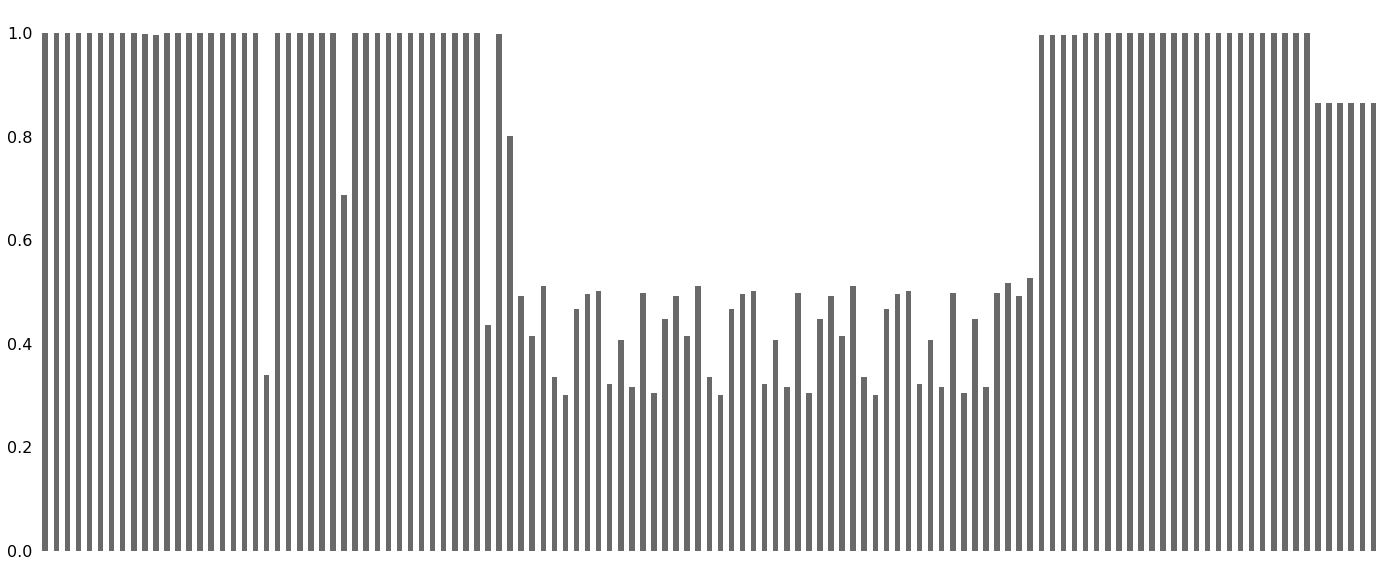

In [7]:
import missingno as msno
%matplotlib inline
msno.bar(df);
# 約半数近く欠損を抱えているデータが多く見られる

In [8]:
# 欠損値がある特徴量
def missing_df_check(df):
    missing_df = pd.DataFrame(df.count(), columns=['count'])
    missing_df['is_null'] = df.isnull().sum()
    missing_df['total'] = missing_df['count']+ missing_df['is_null']
    missing_df['missing_ratio'] = missing_df['is_null'] / missing_df['total']
    return missing_df
display(missing_df_check(df)[missing_df_check(df)['missing_ratio']>0])

,count,is_null,total,missing_ratio
AMT_ANNUITY,307499,12,307511,0.000039
AMT_GOODS_PRICE,307233,278,307511,0.000904
NAME_TYPE_SUITE,306219,1292,307511,0.004201
OWN_CAR_AGE,104582,202929,307511,0.659908
OCCUPATION_TYPE,211120,96391,307511,0.313455
...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992,41519,307511,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,265992,41519,307511,0.135016
AMT_REQ_CREDIT_BUREAU_MON,265992,41519,307511,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,265992,41519,307511,0.135016


In [9]:
## 欠損全部消すのは乱暴
df.loc[:, ['OWN_CAR_AGE', 'FLAG_OWN_CAR']]

,OWN_CAR_AGE,FLAG_OWN_CAR
SK_ID_CURR,,
100002,NaN,N
100003,NaN,N
100004,26.0,Y
100006,NaN,N
100007,NaN,N
...,...,...
456251,NaN,N
456252,NaN,N
456253,NaN,N


In [10]:
# クラスごとのデータ数をグラフに出す
df['TARGET'].value_counts(

SyntaxError: unexpected EOF while parsing (<ipython-input-10-515534cee6e4>, line 2)

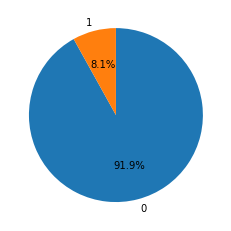

In [11]:
plt.pie(df['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=df['TARGET'].value_counts().index);

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを **15個以上** 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

### 課題設定
収入が高い人ほど返済をしている可能性が高いと想定

In [12]:
# 収入の情報確認
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

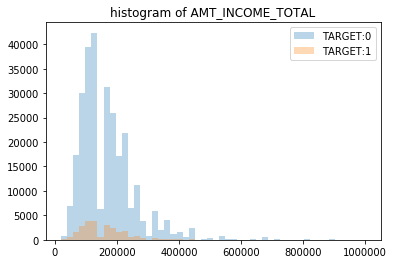

In [13]:
plt.title('histogram of AMT_INCOME_TOTAL')
plt.hist(df[df['TARGET'] == 0]['AMT_INCOME_TOTAL'], bins=50, range=(20000, 1000000), alpha=0.3, label='TARGET:0')
plt.hist(df[df['TARGET'] == 1]['AMT_INCOME_TOTAL'], bins=50, range=(20000, 1000000), alpha=0.3, label='TARGET:1')
plt.legend();

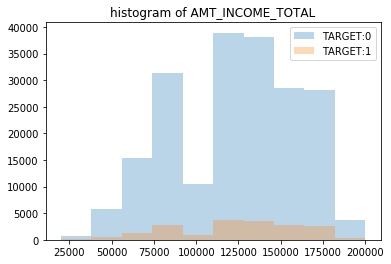

In [14]:
plt.title('histogram of AMT_INCOME_TOTAL')
plt.hist(df[df['TARGET'] == 0]['AMT_INCOME_TOTAL'], bins=10, range=(20000, 200000), alpha=0.3, label='TARGET:0')
plt.hist(df[df['TARGET'] == 1]['AMT_INCOME_TOTAL'], bins=10, range=(20000, 200000), alpha=0.3, label='TARGET:1')
plt.legend();

実量ではわからないので、正規化してみる

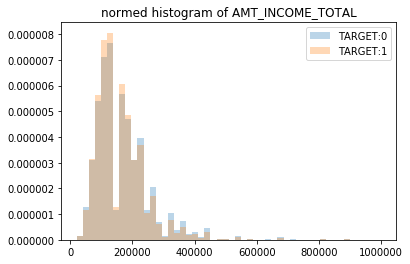

In [15]:
plt.title('normed histogram of AMT_INCOME_TOTAL')
plt.hist(df[df['TARGET'] == 0]['AMT_INCOME_TOTAL'], bins=50, range=(20000, 1000000), alpha=0.3, label='TARGET:0', density=True)
plt.hist(df[df['TARGET'] == 1]['AMT_INCOME_TOTAL'], bins=50, range=(20000, 1000000), alpha=0.3, label='TARGET:1', density=True)
plt.legend();

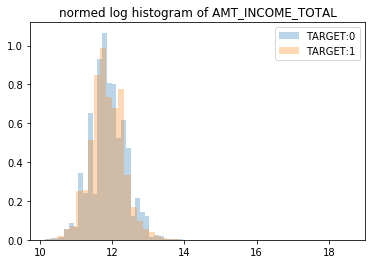

In [16]:
# 対数変換も行ってみる
plt.title('normed log histogram of AMT_INCOME_TOTAL')
plt.hist(np.log(df[df['TARGET'] == 0]['AMT_INCOME_TOTAL']), bins=50, alpha=0.3, label='TARGET:0', density=True)
plt.hist(np.log(df[df['TARGET'] == 1]['AMT_INCOME_TOTAL']), bins=50, alpha=0.3, label='TARGET:1', density=True)
plt.legend();

ヒストグラム上では、収入と返済に関する関係性があるかどうかは不明
単純な収入の多寡だけではなく、顧客の職業別で収入と返済の関係を考察する

In [17]:
# 収入別の数値確認
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [18]:
# 欠損値確認
df['NAME_INCOME_TYPE'].isnull().sum()
# 欠損値がないため特に処理は行わず

0

サンプル数が一定ある、'Working', 'Commercial associate', 'Pensioner', 'State servant'の4Type　での分布を確認する

In [19]:
choice_NAME_INCOME_TYPE = ['Working', 'Commercial associate', 'Pensioner', 'State servant']
def make_histogram(income_type, bins_lst=[50, 50, 50]):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(income_type)
    ax1.set_title('histogram of AMT_INCOME_TOTAL')
    ax1.hist(df[(df['TARGET'] == 0) & (df['NAME_INCOME_TYPE'] == income_type)]['AMT_INCOME_TOTAL'], bins=bins_lst[0], range=(20000, 1000000), alpha=0.3, label='TARGET:0')
    ax1.hist(df[(df['TARGET'] == 1) & (df['NAME_INCOME_TYPE'] == income_type)]['AMT_INCOME_TOTAL'], bins=bins_lst[0], range=(20000, 1000000), alpha=0.3, label='TARGET:1')
    ax1.legend()
    ax2.set_title('normed histogram of AMT_INCOME_TOTAL')
    ax2.hist(df[(df['TARGET'] == 0) & (df['NAME_INCOME_TYPE'] == income_type)]['AMT_INCOME_TOTAL'], bins=bins_lst[1], range=(20000, 1000000), alpha=0.3, label='TARGET:0', density=True)
    ax2.hist(df[(df['TARGET'] == 1) & (df['NAME_INCOME_TYPE'] == income_type)]['AMT_INCOME_TOTAL'], bins=bins_lst[1], range=(20000, 1000000), alpha=0.3, label='TARGET:1', density=True)
    ax2.legend()
    ax3.set_title('normed log histogram of AMT_INCOME_TOTAL')
    ax3.hist(np.log(df[(df['TARGET'] == 0) & (df['NAME_INCOME_TYPE'] == income_type)]['AMT_INCOME_TOTAL']), bins=bins_lst[2], alpha=0.3, label='TARGET:0', density=True)
    ax3.hist(np.log(df[(df['TARGET'] == 1) & (df['NAME_INCOME_TYPE'] == income_type)]['AMT_INCOME_TOTAL']), bins=bins_lst[2], alpha=0.3, label='TARGET:1', density=True)
    ax3.legend()
    plt.show()

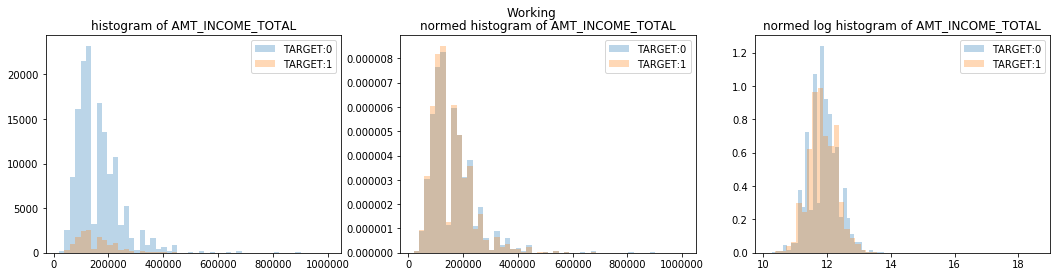

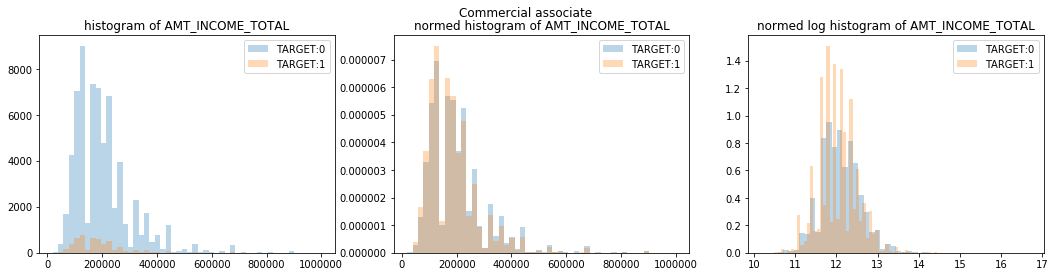

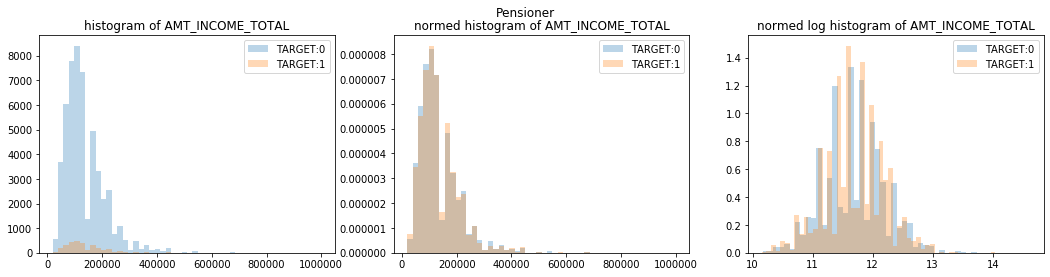

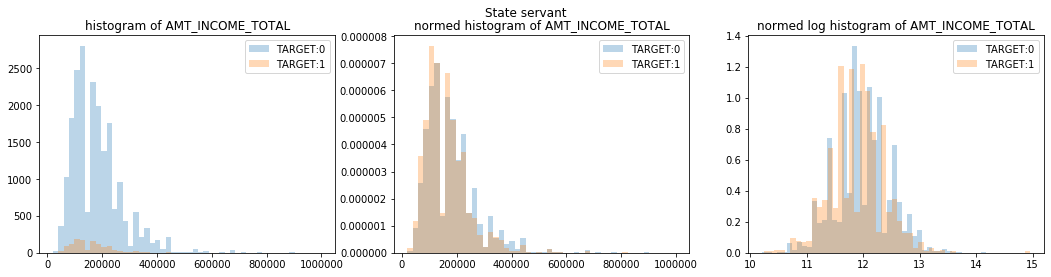

In [20]:
for income_type in choice_NAME_INCOME_TYPE:
    make_histogram(income_type)

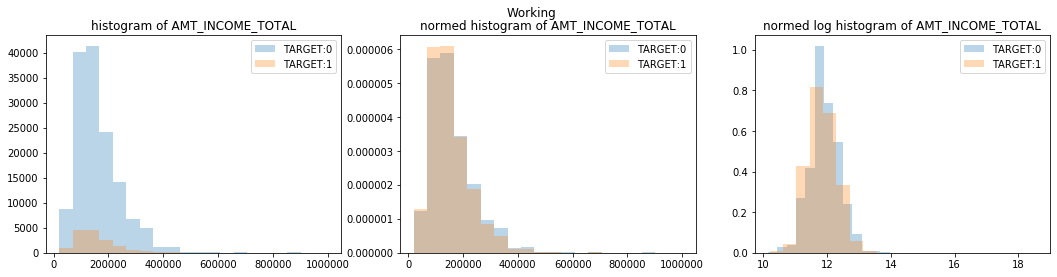

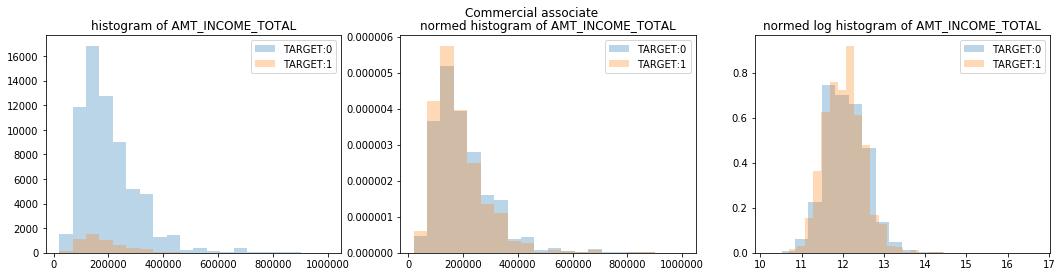

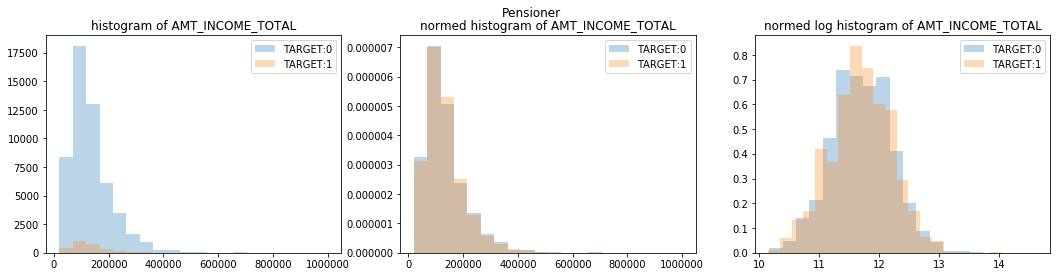

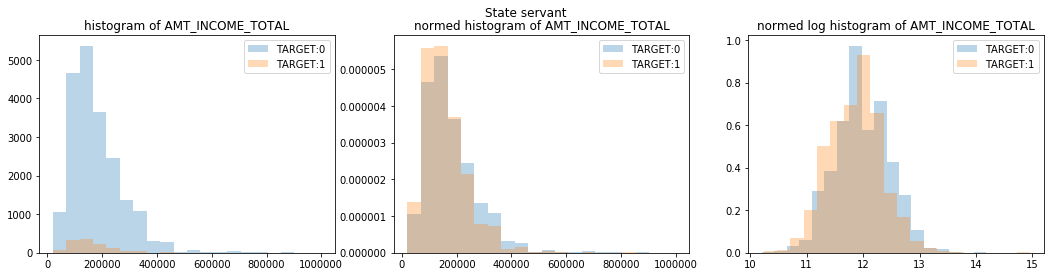

In [21]:
# ビンの数を少なくして表示
for income_type in choice_NAME_INCOME_TYPE:
    make_histogram(income_type, bins_lst=[20, 20, 20])

対数変換を行うと、下位３０％程のグループではTARGET:1の割合が若干多いことが見えたが、明確な関係性は不明
bins=50の対数変換ヒストグラムでは、分布に規則性が見られず、TARGET:0,TARGET:1それぞれが多い範囲が互い違いに起こっていた

In [22]:
# 職業別でも見てみる
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
df['OCCUPATION_TYPE'].isnull().sum()

96391

In [24]:
# 欠損値は職業不明として埋める
df['OCCUPATION_TYPE'].fillna('Occupation_unknown', inplace=True)
df['OCCUPATION_TYPE'].isnull().sum()

0

In [25]:
pd.pivot_table(df, index='OCCUPATION_TYPE', columns='NAME_INCOME_TYPE', values='TARGET', aggfunc='count', margins=True, fill_value=0, dropna=False)

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,All
OCCUPATION_TYPE,,,,,,,,,
Accountants,0,3970,1,0,729,1,0,5112,9813
Cleaning staff,0,892,0,2,261,0,0,3498,4653
Cooking staff,0,1305,0,0,453,0,0,4188,5946
Core staff,1,6528,2,0,6956,3,0,14080,27570
Drivers,0,4916,0,0,815,1,0,12871,18603
HR staff,0,220,0,0,64,0,0,279,563
High skill tech staff,0,3495,0,0,1033,0,0,6852,11380
IT staff,0,204,0,0,55,0,0,267,526
Laborers,0,12763,1,1,1868,5,0,40548,55186


職業不詳の７割程が、年金受給者となっているため、無職であると想定される

### 課題設定
ローン与信額が高い顧客は、返済可能性が高いのでは？
AMT_CREDIT, AMT_ANNUITYの分布を確認

In [26]:
# 欠損値の確認
print(df.AMT_CREDIT.isnull().sum())
print(df.AMT_ANNUITY.isnull().sum())

0
12


In [27]:
# 僅少のため、平均値を入れて対応
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(), inplace=True)
print(df.AMT_ANNUITY.isnull().sum())

0


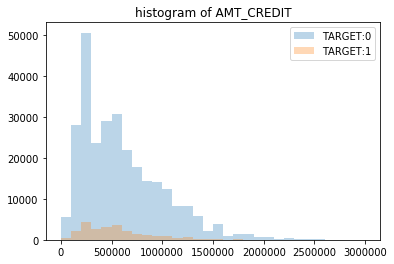

In [28]:
plt.title('histogram of AMT_CREDIT')
plt.hist(df[df['TARGET'] == 0]['AMT_CREDIT'], bins=30, range=(0, 3000000), alpha=0.3, label='TARGET:0')
plt.hist(df[df['TARGET'] == 1]['AMT_CREDIT'], bins=30, range=(0, 3000000), alpha=0.3, label='TARGET:1')
plt.legend();

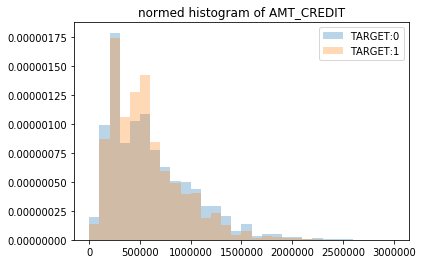

In [29]:
plt.title('normed histogram of AMT_CREDIT')
plt.hist(df[df['TARGET'] == 0]['AMT_CREDIT'], bins=30, range=(0, 3000000), alpha=0.3, label='TARGET:0', density=True)
plt.hist(df[df['TARGET'] == 1]['AMT_CREDIT'], bins=30, range=(0, 3000000), alpha=0.3, label='TARGET:1', density=True)
plt.legend();

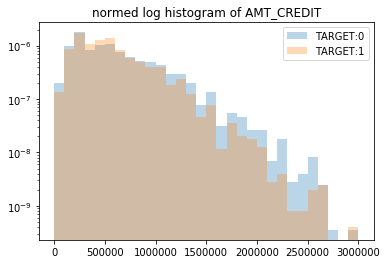

In [30]:
plt.title('normed log histogram of AMT_CREDIT')
plt.hist(df[df['TARGET'] == 0]['AMT_CREDIT'], bins=30, range=(0, 3000000), alpha=0.3, label='TARGET:0', density=True, log=True)
plt.hist(df[df['TARGET'] == 1]['AMT_CREDIT'], bins=30, range=(0, 3000000), alpha=0.3, label='TARGET:1', density=True, log=True)
plt.legend();

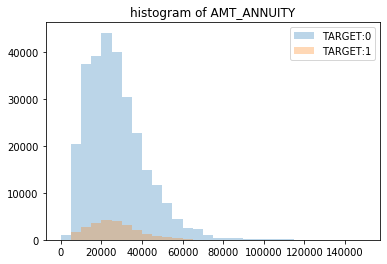

In [31]:
plt.title('histogram of AMT_ANNUITY')
plt.hist(df[df['TARGET'] == 0]['AMT_ANNUITY'], bins=30, range=(0, 150000), alpha=0.3, label='TARGET:0')
plt.hist(df[df['TARGET'] == 1]['AMT_ANNUITY'], bins=30, range=(0, 150000), alpha=0.3, label='TARGET:1')
plt.legend();

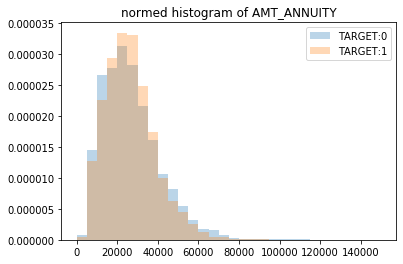

In [32]:
plt.title('normed histogram of AMT_ANNUITY')
plt.hist(df[df['TARGET'] == 0]['AMT_ANNUITY'], bins=30, range=(0, 150000), alpha=0.3, label='TARGET:0', density=True)
plt.hist(df[df['TARGET'] == 1]['AMT_ANNUITY'], bins=30, range=(0, 150000), alpha=0.3, label='TARGET:1', density=True)
plt.legend();

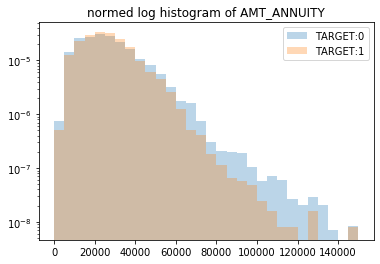

In [33]:
plt.title('normed log histogram of AMT_ANNUITY')
plt.hist(df[df['TARGET'] == 0]['AMT_ANNUITY'], bins=30, range=(0, 150000), alpha=0.3, label='TARGET:0', density=True, log=True)
plt.hist(df[df['TARGET'] == 1]['AMT_ANNUITY'], bins=30, range=(0, 150000), alpha=0.3, label='TARGET:1', density=True, log=True)
plt.legend();

AMT_CREDIT, AMT_ANNUITYともにローン金額の対数金額が増加すると、 TARGET:0になる可能性が増加している

 ## 課題設定
顧客属性によって返済可能性の有無が見受けられないか確認

- 性別差による返済可能性の確認

In [34]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

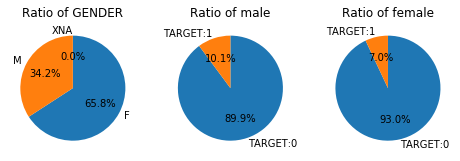

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))
ax1.pie(df['CODE_GENDER'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=df['CODE_GENDER'].value_counts().index)
ax1.set_title('Ratio of GENDER')
ax2.pie(df[df['CODE_GENDER']=='M']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax2.set_title('Ratio of male')
ax3.pie(df[df['CODE_GENDER']=='F']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax3.set_title('Ratio of female')
plt.show()

女性の方が返済困難になる割合が少ない

- 車や家を所有している顧客より、所有していない顧客が返済困難になると想定

In [36]:
df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

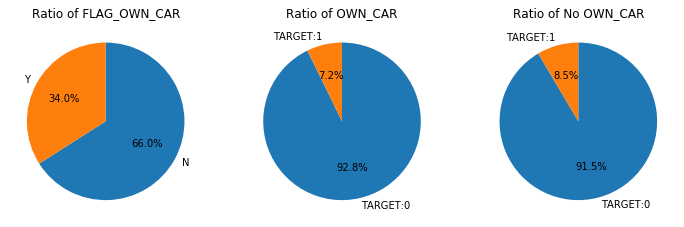

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.pie(df['FLAG_OWN_CAR'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=df['FLAG_OWN_CAR'].value_counts().index)
ax1.set_title('Ratio of FLAG_OWN_CAR')
ax2.pie(df[df['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax2.set_title('Ratio of OWN_CAR')
ax3.pie(df[df['FLAG_OWN_CAR']=='N']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax3.set_title('Ratio of No OWN_CAR')
plt.show()

車所有者の方が返済困難になる割合が小さい

-　車の所有年数に応じて、上記結果に変化があるか検証

In [38]:
# column 'OWN_CAR_AGE'の欠損確認
df['OWN_CAR_AGE'].isnull().sum()

202929

In [39]:
# 欠損は０で埋める
df.fillna({'OWN_CAR_AGE': 0}, inplace=True)

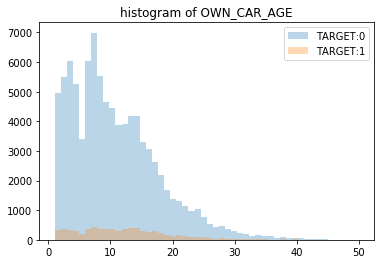

In [40]:
# ヒストグラムで分布確認
plt.title('histogram of OWN_CAR_AGE')
plt.hist(df[df['TARGET'] == 0]['OWN_CAR_AGE'], bins=50, range=(1, 50), alpha=0.3, label='TARGET:0')
plt.hist(df[df['TARGET'] == 1]['OWN_CAR_AGE'], bins=50, range=(1, 50), alpha=0.3, label='TARGET:1')
plt.legend();

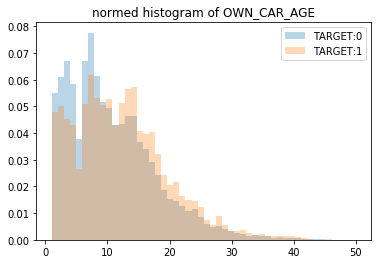

In [41]:
# 正規化する
plt.title('normed histogram of OWN_CAR_AGE')
plt.hist(df[df['TARGET'] == 0]['OWN_CAR_AGE'], density=True, bins=50, range=(1, 50), alpha=0.3, label='TARGET:0')
plt.hist(df[df['TARGET'] == 1]['OWN_CAR_AGE'], density=True, bins=50, range=(1, 50), alpha=0.3, label='TARGET:1')
plt.legend();

/Users/ikeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ikeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


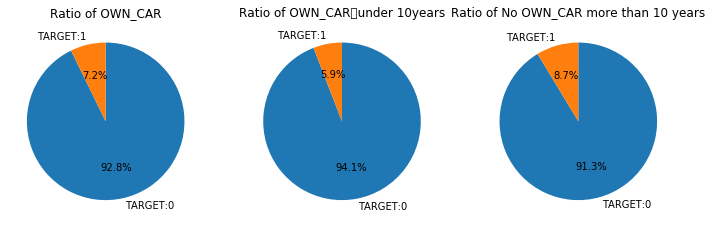

In [42]:
# 車の使用年数１０年でグループ分け
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.pie(df[df['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax1.set_title('Ratio of OWN_CAR')
ax2.pie(df[(df['FLAG_OWN_CAR']=='Y') & (df['OWN_CAR_AGE'] < 10)]['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax2.set_title('Ratio of OWN_CAR　under 10years')
ax3.pie(df[(df['FLAG_OWN_CAR']=='Y') & (df['OWN_CAR_AGE'] >= 10)]['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax3.set_title('Ratio of No OWN_CAR more than 10 years')
plt.show()

車の使用年数が高いグループ（古い車を使用し続けている）では、返済困難な顧客の割合が多くなっている

In [43]:
df['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

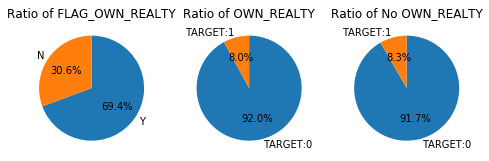

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))
ax1.pie(df['FLAG_OWN_REALTY'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=df['FLAG_OWN_REALTY'].value_counts().index)
ax1.set_title('Ratio of FLAG_OWN_REALTY')
ax2.pie(df[df['FLAG_OWN_REALTY']=='Y']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax2.set_title('Ratio of OWN_REALTY')
ax3.pie(df[df['FLAG_OWN_REALTY']=='N']['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
ax3.set_title('Ratio of No OWN_REALTY')
plt.show()

家の所有による大きな差異は見受けられない

- 学歴による返済可能性に変動がないか、確認してみる

In [45]:
print(df['NAME_EDUCATION_TYPE'].value_counts())
print(df['NAME_EDUCATION_TYPE'].isnull().sum())
# 欠損はなし

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
0


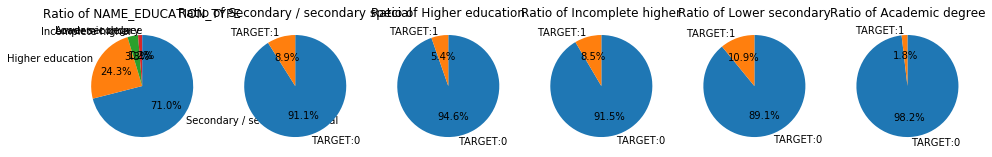

In [46]:
fig, axes = plt.subplots(1, 6, figsize=(16, 4))
axes[0].pie(df['NAME_EDUCATION_TYPE'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=df['NAME_EDUCATION_TYPE'].value_counts().index)
axes[0].set_title('Ratio of NAME_EDUCATION_TYPE')
for i, education in enumerate(df['NAME_EDUCATION_TYPE'].value_counts().index, 1):
    axes[i].pie(df[df['NAME_EDUCATION_TYPE']==education]['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=['TARGET:0', 'TARGET:1'])
    axes[i].set_title('Ratio of {}'.format(education))
plt.show()

高等教育、学位を修めているものは、全体の25％程度であるが返済困難な顧客の割合は他と比較して低くなっている

また、学歴別の収入分布を見てみると、高学歴ほど高収入になる傾向があり、収入の多寡が返済に及ぼす影響があることも想定される

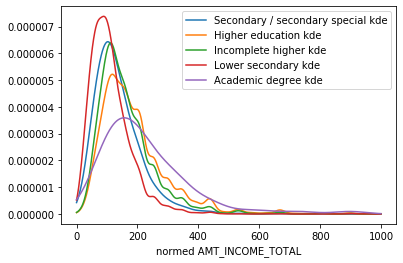

In [47]:
from scipy.stats import gaussian_kde
for education in df['NAME_EDUCATION_TYPE'].value_counts().index:
    x = df[df['NAME_EDUCATION_TYPE'] == education]['AMT_INCOME_TOTAL']
    # plt.hist(x, bins=30, range=(20000, 1000000), alpha=0.5, label=education, density=True)
    kde = gaussian_kde(x)
    plt.plot(kde(np.linspace(20000, 1000000, num=1000)), label='{} kde'.format(education))
    plt.xlabel('normed AMT_INCOME_TOTAL')
plt.legend()
plt.show()